In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
# ETH price data
import yfinance as yf
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', None)
sns.set_style("white")
# sns.set_theme(style="ticks")

In [2]:
sns.set(rc = {'figure.figsize':(15,8)})

In [3]:
df = pd.read_csv("./results/sentiment_results_verified_nft_tweets.csv", parse_dates=['date']) # https://www.kaggle.com/datasets/adanai/verified-nft-tweets?select=verified_nft_tweets.csv 
df.head()

id       date      time       username  \
0  1.370000e+18 2021-02-28   0:52:48  davidzhorvath   
1  1.370000e+18 2021-02-27  20:07:42    starkillers   
2  1.370000e+18 2021-02-27  19:10:44             tj   
3  1.370000e+18 2021-02-27  18:40:02  john_dahlback   
4  1.370000e+18 2021-02-27   5:12:26       teedubya   

                                                                                                                                                                                                                                                                                                           tweet  \
0                         My work, one of many, from a solo show in Tokyo maybe 15 years ago? All of my art is digital with the exception of the line work. I could never really hang color originals so I would include the original drawing with my 1/1 print. #nftart gives me hope.  https://t.co/qfc90NM44r   
1                                                                                                                                                                                  #nftart article from @Forbes #zil @zilliqa get my #nft here.  https://t.co/cy3f8pYLAq   https://t.co/4s7novGp2w @mintable_app   
2                                                                                                                                                                            More colors and info coming soon. But in the meantime read the whitepaper:  https://t.co/LF0ejhrR9X  #nftart #NFTCommunity @withFND   
3                                                                                                                                                                                                     The auction has started!  https://t.co/MKFCF29Fwp  @withFND #nftart #nft #CRYPTOPUNK #cryptoart @heartaake   
4  Here's some art I began in Nov 2008. I create a new rendition when I'm inspired to add to it.    Soon, it will become an #NFT, most likely, on @rariblecom @opensea or @niftygateway.  This was first created around when #Bitcoin was.    "Sgt. Pepper's Nifty Mastermind"  #NFTart  https://t.co/XxRXoTRDgV   

  language                             mentioned_user  \
0       en                                         []   
1       en      ['forbes', 'zilliqa', 'mintable_app']   
2       en                                         []   
3       en                              ['heartaake']   
4       en  ['rariblecom', 'opensea', 'niftygateway']   

                          forum  replies_count  retweets_count  likes_count  \
0                            []              1               0            9   
1  ['www.forbes.com', 'bit.ly']              1              15           56   
2       ['www.colorblocks.org']              1               1            1   
3            ['foundation.app']              3               3           11   
4                            []             10              12          144   

                                       hashtags cashtags quoted_user  video  \
0                                    ['nftart']       []        none      1   
1                      ['nftart', 'zil', 'nft']       []        none      0   
2                    ['nftart', 'nftcommunity']       []        none      0   
3  ['nftart', 'nft', 'cryptopunk', 'cryptoart']       []        none      0   
4                  ['nft', 'bitcoin', 'nftart']       []        none      1   

  reply_to_user  positive_score  negative_score  neutral_score sentiment  
0            []        0.623073        0.013336       0.363591  Positive  
1            []        0.118895        0.006305       0.874800   Neutral  
2            []        0.301916        0.003726       0.694358   Neutral  
3            []        0.474763        0.003055       0.522182   Neutral  
4            []        0.501436        0.005433       0.493132  Positive

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84416 entries, 0 to 84415
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              84416 non-null  float64       
 1   date            84416 non-null  datetime64[ns]
 2   time            84416 non-null  object        
 3   username        84416 non-null  object        
 4   tweet           84416 non-null  object        
 5   language        84416 non-null  object        
 6   mentioned_user  84416 non-null  object        
 7   forum           84416 non-null  object        
 8   replies_count   84416 non-null  int64         
 9   retweets_count  84416 non-null  int64         
 10  likes_count     84416 non-null  int64         
 11  hashtags        84416 non-null  object        
 12  cashtags        84416 non-null  object        
 13  quoted_user     84416 non-null  object        
 14  video           84416 non-null  int64         
 15  re

In [5]:
print('earliest datetime: ',min(df.date), '\n', 'latest datetime: ', max(df.date))

earliest datetime:  2020-10-01 00:00:00 
 latest datetime:  2022-03-26 00:00:00


In [6]:
df.describe()

id  replies_count  retweets_count    likes_count  \
count  8.441600e+04   84416.000000    84416.000000   84416.000000   
mean   1.452380e+18      62.788891       78.450661     164.876955   
std    4.160073e+16     592.042702      696.924449    1064.686700   
min    1.310000e+18       0.000000        0.000000       0.000000   
25%    1.430000e+18       0.000000        0.000000       5.000000   
50%    1.460000e+18       2.000000        3.000000      15.000000   
75%    1.490000e+18      10.000000       14.000000      66.000000   
max    1.510000e+18   84925.000000    73142.000000  121108.000000   

              video  positive_score  negative_score  neutral_score  
count  84416.000000    84416.000000    84416.000000   84416.000000  
mean       0.442843        0.577291        0.039162       0.383547  
std        0.496725        0.331343        0.133886       0.302868  
min        0.000000        0.003646        0.000849       0.004653  
25%        0.000000        0.257970        0.002352       0.085863  
50%        0.000000        0.619717        0.003598       0.340782  
75%        1.000000        0.909578        0.007192       0.655727  
max        1.000000        0.993500        0.963737       0.964498

In [7]:
df['replies_count_bins'] = np.where(df.replies_count<=10, 0, np.where(df.replies_count <=62, 1, 2))
df['retweets_count_bins'] = np.where(df.replies_count<=14, 0, np.where(df.replies_count <=78, 1, 2))
df['likes_count_bins'] = np.where(df.replies_count<=66, 0, np.where(df.replies_count <=164, 1, 2))

In [8]:
# distribution of replies count
print('Replies Bins Value Count')
print(df['replies_count_bins'].value_counts())
print('Retweets Bins Value Count')
print(df['retweets_count_bins'].value_counts())
print('Likes Bins Value Count')
print(df['likes_count_bins'].value_counts())

Replies Bins Value Count
0    63850
1    11705
2     8861
Name: replies_count_bins, dtype: int64
Retweets Bins Value Count
0    66405
1    10228
2     7783
Name: retweets_count_bins, dtype: int64
Likes Bins Value Count
0    75863
2     5051
1     3502
Name: likes_count_bins, dtype: int64


In [9]:
df_grp = df.groupby('date').agg({'id':'count'})

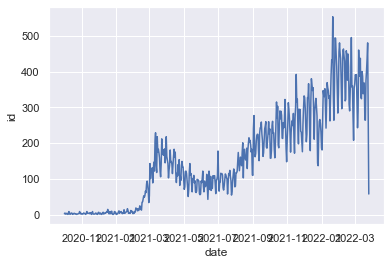

In [10]:
plt.rcParams.update({'figure.figsize': (15, 10)})
sns.lineplot(data=df_grp, x='date', y='id')
plt.show()

In [11]:
sentiment_group = df.groupby('sentiment').agg({'sentiment':'count'})
sentiment_group

sentiment
sentiment           
Negative        2715
Neutral        32032
Positive       49669

In [12]:
sentiment_group_date = df.groupby(['date','sentiment']).agg({'id':'count'})
sentiment_group_date

id
date       sentiment     
2020-10-01 Neutral      1
           Positive     2
2020-10-02 Neutral      3
           Positive     2
2020-10-03 Positive     2
...                   ...
2022-03-25 Negative    11
           Neutral     75
           Positive   165
2022-03-26 Neutral     22
           Positive    36

[1453 rows x 1 columns]

In [13]:
sentiment_group_date_replies = df.groupby(['date','sentiment','replies_count_bins']).agg({'id':'count'}).reset_index()
sentiment_group_date

id
date       sentiment     
2020-10-01 Neutral      1
           Positive     2
2020-10-02 Neutral      3
           Positive     2
2020-10-03 Positive     2
...                   ...
2022-03-25 Negative    11
           Neutral     75
           Positive   165
2022-03-26 Neutral     22
           Positive    36

[1453 rows x 1 columns]

In [14]:
sentiment_group_date_retweets = df.groupby(['date','sentiment','retweets_count_bins']).agg({'id':'count'}).reset_index()
sentiment_group_date_retweets

date sentiment  retweets_count_bins  id
0    2020-10-01   Neutral                    0   1
1    2020-10-01  Positive                    0   2
2    2020-10-02   Neutral                    0   3
3    2020-10-02  Positive                    0   2
4    2020-10-03  Positive                    0   2
...         ...       ...                  ...  ..
3275 2022-03-26   Neutral                    1   1
3276 2022-03-26   Neutral                    2   6
3277 2022-03-26  Positive                    0  19
3278 2022-03-26  Positive                    1   5
3279 2022-03-26  Positive                    2  12

[3280 rows x 4 columns]

In [15]:
sentiment_group_date_likes = df.groupby(['date','sentiment','likes_count_bins']).agg({'id':'count'}).reset_index()
sentiment_group_date_likes

date sentiment  likes_count_bins  id
0    2020-10-01   Neutral                 0   1
1    2020-10-01  Positive                 0   2
2    2020-10-02   Neutral                 0   3
3    2020-10-02  Positive                 0   2
4    2020-10-03  Positive                 0   2
...         ...       ...               ...  ..
2879 2022-03-26   Neutral                 0  16
2880 2022-03-26   Neutral                 2   6
2881 2022-03-26  Positive                 0  24
2882 2022-03-26  Positive                 1   5
2883 2022-03-26  Positive                 2   7

[2884 rows x 4 columns]

In [16]:
df_dist = df.groupby('username').agg({'id':'count'}).sort_values('id',ascending=False)
df_dist['cumsum'] = df_dist.cumsum()
df_dist['cumsum_pc'] = df_dist['cumsum']/len(df)
df_dist

id  cumsum  cumsum_pc
username                                
markshaw         1611    1611   0.019084
kokid951         1493    3104   0.036770
jayalders         886    3990   0.047266
davidgokhshtein   855    4845   0.057394
wazirxnft         846    5691   0.067416
...               ...     ...        ...
jimmerfredette      1   84412   0.999953
jikkuvarghese       1   84413   0.999964
jhrubin             1   84414   0.999976
jhnemechek          1   84415   0.999988
zwiezenz            1   84416   1.000000

[7693 rows x 3 columns]

In [17]:
print('Proportion of users tweets: ',len(df_dist[df_dist['cumsum_pc']<=0.8])/len(df_dist))

Proportion of users tweets:  0.12998830105290524


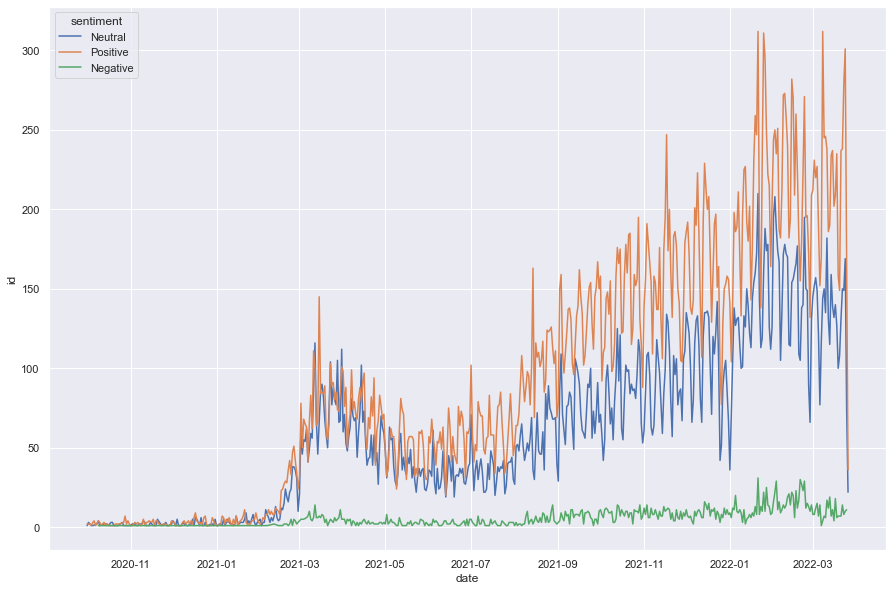

In [18]:
plt.rcParams.update({'figure.figsize': (15, 10)})
sns.lineplot(data=sentiment_group_date, x='date', y='id', hue='sentiment')
plt.show()

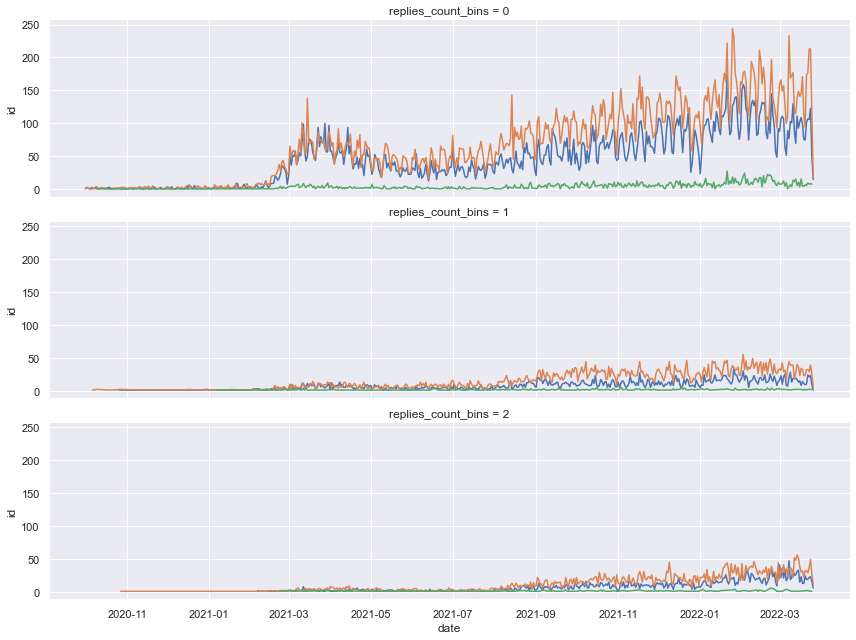

In [19]:
g = sns.FacetGrid(sentiment_group_date_replies, row="replies_count_bins", hue="sentiment",height=3, aspect= 4)

# Draw the densities in a few steps
g.map(sns.lineplot, "date", "id")
plt.show()

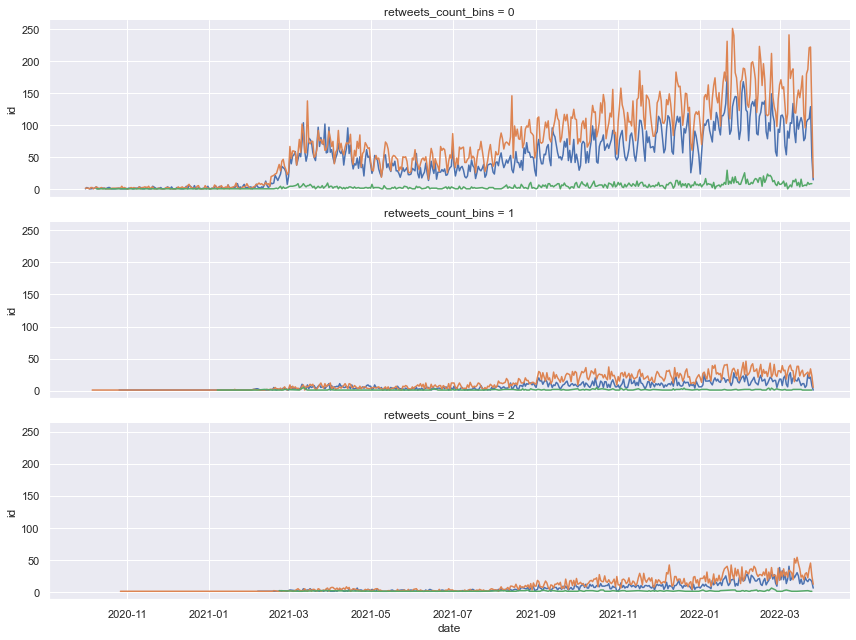

In [20]:
g = sns.FacetGrid(sentiment_group_date_retweets, row="retweets_count_bins", hue="sentiment",height=3, aspect= 4)

# Draw the densities in a few steps
g.map(sns.lineplot, "date", "id")
plt.show()

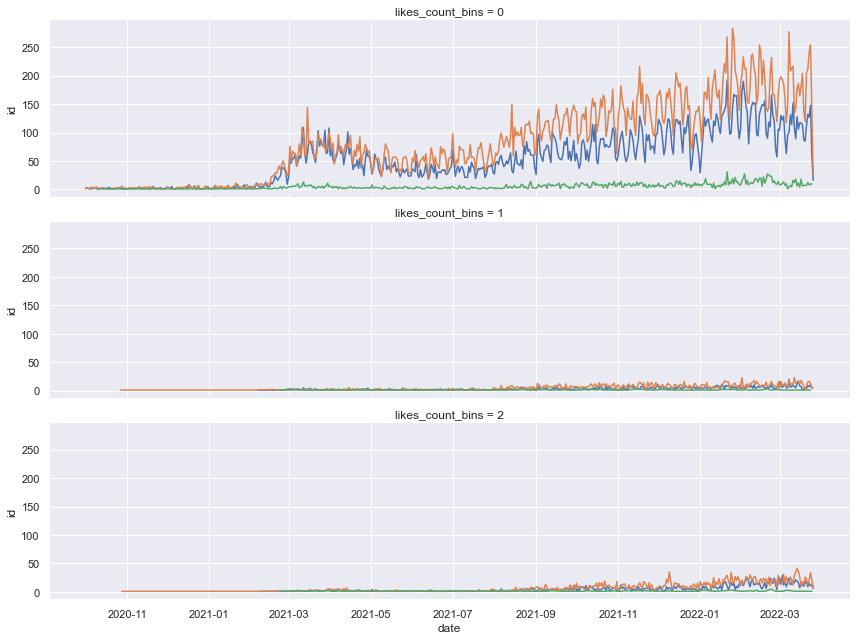

In [21]:
g = sns.FacetGrid(sentiment_group_date_likes, row="likes_count_bins", hue="sentiment",height=3, aspect= 4)

# Draw the densities in a few steps
g.map(sns.lineplot, "date", "id")
plt.show()

ETH Price

In [30]:
eth_price = yf.Ticker('ETH-USD').history(start='2020-10-02',  
                                          end='2022-03-26', 
                                          interval='1d', 
                                          actions=False).reset_index()

eth_price

Date         Open         High          Low        Close  \
0   2020-10-01   360.309143   369.264404   346.477051   353.205902   
1   2020-10-02   352.949677   354.115417   336.467163   346.238922   
2   2020-10-03   346.218628   351.307709   344.666565   346.522095   
3   2020-10-04   346.602234   354.045746   345.131012   352.579010   
4   2020-10-05   352.736816   355.214081   349.679901   353.956787   
..         ...          ...          ...          ...          ...   
536 2022-03-21  2860.103271  2954.556641  2838.250488  2897.976562   
537 2022-03-22  2897.774170  3040.382812  2892.544434  2973.131104   
538 2022-03-23  2973.145020  3036.752197  2933.306641  3031.067139   
539 2022-03-24  3031.060791  3118.387695  3012.326660  3108.062012   
540 2022-03-25  3108.448975  3183.958008  3087.490723  3106.671387   

          Volume  
0    14679481911  
1    14215390463  
2    10060167889  
3    10696959020  
4    11809507622  
..           ...  
536  15206116098  
537  16830539230  
538  16008767658  
539  18070503166  
540  17030503831  

[541 rows x 6 columns]

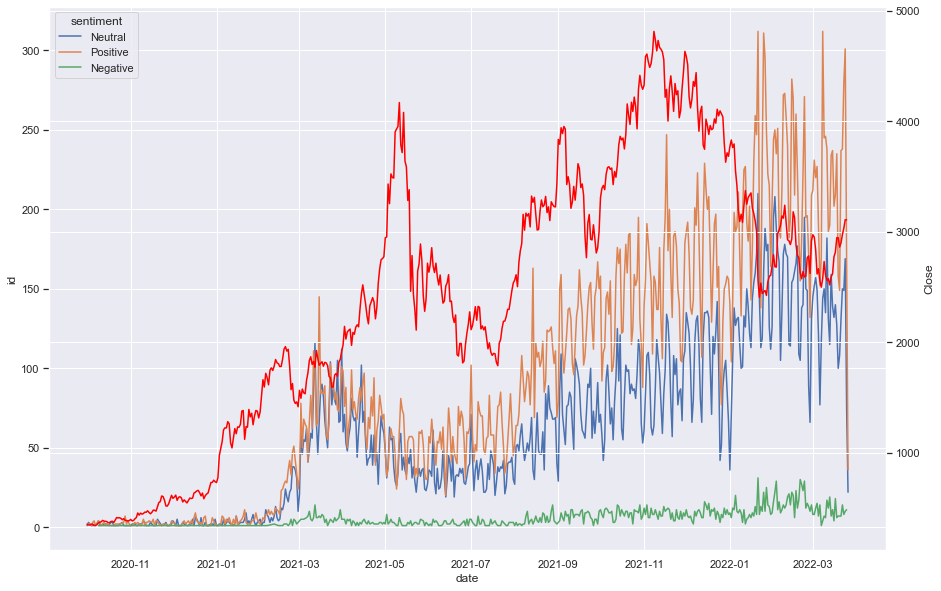

In [32]:
plt.rcParams.update({'figure.figsize': (15, 10)})
sns.lineplot(data=sentiment_group_date, x='date', y='id', hue='sentiment')
ax2 = plt.twinx()
sns.lineplot(data=eth_price, x='Date', y='Close', color='red', ax=ax2)
plt.show()

In [43]:
df['score'] = np.where(df.sentiment=='Positive',1,
                      np.where(df.sentiment=='Negative',-1,0))
temp_df = df.groupby('date').agg({'score':'sum'}).reset_index()
temp_df

date  score
0   2020-10-01      2
1   2020-10-02      2
2   2020-10-03      2
3   2020-10-04      1
4   2020-10-05      3
..         ...    ...
535 2022-03-22    224
536 2022-03-23    271
537 2022-03-24    291
538 2022-03-25    154
539 2022-03-26     36

[540 rows x 2 columns]

In [45]:
join_df = eth_price.merge(temp_df, how='left', left_on='Date', right_on='date')
join_df = join_df[['Date','Close','score']]
join_df.corr()

Close     score
Close  1.000000  0.708306
score  0.708306  1.000000

Validation

In [24]:
# df[(df.username=='jamahalh')]

In [25]:
# pos_sample = df[['tweet','positive_score','negative_score','neutral_score']][df.sentiment=='Positive'].sample(n=100, random_state=2022)
# pos_sample

In [26]:
# neg_sample = df[['tweet','positive_score','negative_score','neutral_score']][df.sentiment=='Negative'].sample(n=100, random_state=2022)
# neg_sample

In [27]:
# neu_sample = df[['tweet','positive_score','negative_score','neutral_score']][df.sentiment=='Neutral'].sample(n=100, random_state=2022)
# neu_sample

In [28]:
# pos_sample.to_csv('./results/validation_positive.csv', index=False)
# neg_sample.to_csv('./results/validation_negative.csv', index=False)
# neu_sample.to_csv('./results/validation_neutral.csv', index=False)

Topic modeling

In [29]:
from bertopic import BERTopic
import re

In [30]:
df_topic = df.copy()

In [31]:
# basic cleaning
# remove words that start with http, nft, #nft
df_topic.tweet = df_topic.apply(lambda row: re.sub(r"http\S+", "", row.tweet).lower(), 1)
df_topic.tweet = df_topic.apply(lambda row: " ".join(filter(lambda x:x[0:3]!="nft", row.tweet.split())), 1)
df_topic.tweet = df_topic.apply(lambda row: " ".join(filter(lambda x:x[0:4]!="#nft", row.tweet.split())), 1)
# remove mentions
df_topic.tweet = df_topic.apply(lambda row: " ".join(filter(lambda x:x[0]!="@", row.tweet.split())), 1)
# remove non-english words
df_topic.tweet = df_topic.apply(lambda row: " ".join(re.sub("[^a-zA-Z]+", " ", row.tweet).split()), 1)
# remove words with less than 2 characters
df_topic.tweet = df_topic.apply(lambda row: " ".join(re.sub(r"\b(\w{1,3})\b", "", row.tweet).split()), 1)
df_topic

id       date      time       username  \
0      1.370000e+18 2021-02-28   0:52:48  davidzhorvath   
1      1.370000e+18 2021-02-27  20:07:42    starkillers   
2      1.370000e+18 2021-02-27  19:10:44             tj   
3      1.370000e+18 2021-02-27  18:40:02  john_dahlback   
4      1.370000e+18 2021-02-27   5:12:26       teedubya   
...             ...        ...       ...            ...   
84411  1.510000e+18 2022-03-20  11:53:55    herbertrsim   
84412  1.500000e+18 2022-03-18  20:45:36    isocialfanz   
84413  1.510000e+18 2022-03-25  20:46:49     nickcarter   
84414  1.510000e+18 2022-03-20  11:53:55    herbertrsim   
84415  1.500000e+18 2022-03-18  23:07:36  lakshmimanchu   

                                                                                                                                                                             tweet  \
0         work many from solo show tokyo maybe years digital with exception line work could never really hang color originals would include original drawing with print gives hope   
1                                                                                                                                                                article from here   
2                                                                                                                            more colors info coming soon meantime read whitepaper   
3                                                                                                                                             auction started cryptopunk cryptoart   
4                                       here some began create rendition when inspired soon will become most likely this first created around when bitcoin pepper nifty mastermind   
...                                                                                                                                                                            ...   
84411                                     mythical series produced former person charge character design animation tiktok douyin bytedance check today rawr loldevils loldevilsnft   
84412  joined team mission based project focused both empowering high performers uniting athletes grow learn together empowering personaldevelopment mindset mentalhealth teamwork   
84413                                                                                                                                               literally waiting like fanatic   
84414                                     mythical series produced former person charge character design animation tiktok douyin bytedance check today rawr loldevils loldevilsnft   
84415                                                 good night tweeple today good will make sure tomorrow better fromnothingtoeverything happybirthdaynana happypournami newmoon   

      language                             mentioned_user  \
0           en                                         []   
1           en      ['forbes', 'zilliqa', 'mintable_app']   
2           en                                         []   
3           en                              ['heartaake']   
4           en  ['rariblecom', 'opensea', 'niftygateway']   
...        ...                                        ...   
84411       en         ['soulkey_artist', 'loldevilsnft']   
84412       en                           ['metaathletes']   
84413       en                              ['zinutoken']   
84414       en         ['soulkey_artist', 'loldevilsnft']   
84415       en                                         []   

                              forum  replies_count  retweets_count  ...  \
0                                []              1               0  ...   
1      ['www.forbes.com', 'bit.ly']              1              15  ...   
2           ['www.colorblocks.org']              1               1  ...   
3                ['foundation.app']              3               3  ...   
4              

In [32]:
timestamps = df_topic.date.to_list()
docs = df_topic.tweet.tolist()
classes = df_topic["sentiment"].tolist()

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

stopwords = list(stopwords.words('english')) + ['http', 'https', 'amp', 'com']

vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words=stopwords, min_df=10)

In [34]:
from sentence_transformers import SentenceTransformer
sentence_model = SentenceTransformer("all-MiniLM-L6-v2") #all-MiniLM-L6-v2 ; all-mpnet-base-v2 ; all-MiniLM-L12-v2
embeddings = sentence_model.encode(docs, show_progress_bar=False)

In [35]:
model = BERTopic(language="english"
                 , embedding_model=sentence_model 
                 , nr_topics="auto"
                 , top_n_words = 10
                 , vectorizer_model=vectorizer_model
                 , min_topic_size=200
                 , diversity=0.2
                 , low_memory=True
                 , verbose=True
                 )

In [36]:
topics, probs = model.fit_transform(docs)

Batches:   0%|          | 0/2638 [00:00<?, ?it/s]

2022-06-19 17:39:18,048 - BERTopic - Transformed documents to Embeddings
2022-06-19 17:40:40,111 - BERTopic - Reduced dimensionality
2022-06-19 17:40:59,656 - BERTopic - Clustered reduced embeddings
2022-06-19 17:41:16,507 - BERTopic - Reduced number of topics from 50 to 35


In [37]:
topics_over_time = model.topics_over_time(docs, topics, timestamps, nr_bins=18)

18it [00:49,  2.74s/it]


In [38]:
model.visualize_topics_over_time(topics_over_time, top_n_topics = 6)

In [39]:
model.get_topic_freq().head(10)

Topic  Count
0     -1  44636
1      0  10564
2      1   5978
3      2   3278
4      3   2001
5      4   1544
6      5   1239
7      6   1176
8      7   1017
9      8    980

In [40]:
model.get_topic_info()

Topic  Count                                                  Name
0      -1  44636                   -1_metaverse_join_crypto_collection
1       0  10564                      0_cryptoart_music_crypto_artists
2       1   5978                        1_metaverse_game_sports_gaming
3       2   3278                     2_giveaway_discord_whitelist_join
4       3   2001                        3_mint_minting_minted_mintable
5       4   1544                4_twitter_tweet_profile_twitter spaces
6       5   1239                  5_project_projects_community_looking
7       6   1176                    6_weekend_understand_going_working
8       7   1017  7_collection_collections_collectors_first collection
9       8    980                      8_market_bcfn_blockchain_trading
10      9    963                   9_tokens_fungible tokens_token_nfts
11     10    915                     10_women_womeninnfts_female_woman
12     11    849                         11_film_movie_india_hollywood
13     12    846                     12_podcast_episode_youtube_crypto
14     13    822              13_opensea_openseanft_surfing_digitalart
15     14    735                      14_auction_bidding_bids_auctions
16     15    596                         15_buying_bought_selling_sale
17     16    591                   16_fashion_brands_digital_metaverse
18     17    561                       17_space_spaces_would_community
19     18    559                    18_christmas_gift_birthday_holiday
20     19    455       19_rarible_digitalasset_nonfungible_collectible
21     20    451              20_drop_first drop_dropped_dropping soon
22     21    367                 21_community_love_communities_support
23     22    366               22_airdrop_airdropped_holders_followers
24     23    309                         23_london_blue_walk_hopefully
25     24    307                24_tezos_hicetnunc_cleannft_highlights
26     25    296                  25_apes_bayc_punks_boredapeyachtclub
27     26    290                            26_scams_safe_crypto_email
28     27    276                         27_doge_dogecoin_moon_bitcoin
29     28    275                   28_bayc_club_boredapeyachtclub_mayc
30     29    274                        29_coolcats_bought_cats_please
31     30    237               30_genesis_collection_dropping_upcoming
32     31    228                     31_floor_floor price_sweep_prices
33     32    225               32_solana_solananfts_solananft_projects
34     33    210        33_halloween_monsters_digitalcollectibles_fund

In [41]:
model.visualize_barchart()

In [42]:
model.visualize_topics()

In [43]:
model.visualize_heatmap()

In [44]:
model.visualize_hierarchy()

In [45]:
topics_per_class = model.topics_per_class(docs, topics, classes=classes)
model.visualize_topics_per_class(topics_per_class)

3it [00:11,  3.68s/it]


In [47]:
model.get_topic(4)[:10]

[('twitter', 0.15617673708117116),
 ('tweet', 0.08508648952030395),
 ('profile', 0.0502510849972967),
 ('twitter spaces', 0.039617717176794104),
 ('tweets', 0.029715636658639175),
 ('social media', 0.0181099419242972),
 ('crypto', 0.01776948121266948),
 ('space', 0.017054646830170304),
 ('crypto metaverse', 0.013295892246643437),
 ('share', 0.011289196215986529)]